In [2]:

import numpy             as np
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import glob
import h5py as h
import random
%matplotlib inline


In [13]:
def Hist2d(title,Energys,Times,binss,xlimit,ylimit):
    fig,ax = plt.subplots(figsize=(8,8))
    plt.hist2d(Energys,Times,bins=binss,cmap=plt.cm.BuGn_r)
    plt.title(title)

    plt.ylabel("Energy keV",fontsize=26)
    plt.xlabel("Time us",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.grid(True)
    plt.tight_layout()

    plt.savefig('/media/ilker/writable/Sim/'+title + '.png')
    plt.show()
    
def Hist1d(title,Energys,Bins,xlabel,ylabel,FileSave=True):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.hist(Energys,bins=Bins,alpha=0.7,label=title)
    plt.ylabel(ylabel,fontsize=26)
    plt.xlabel(xlabel,fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.legend(loc='upper right',fontsize=24,shadow=True, fancybox=True)
    #plt.semilogy()

    plt.grid(True)
    plt.tight_layout()
    if(FileSave):
        plt.savefig('/media/ilker/writable/Sim/'+title + '.png')

    plt.show()

def Plot2d(title,x,y):
    fig,ax = plt.subplots(figsize=(8,8))
    plt.plot(x,y)
    plt.scatter(x,y)
    plt.title(title)
    plt.ylabel("Z mm",fontsize=26)
    plt.xlabel("Y mm",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def Plot3d(title,x,y,z):
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    ax.plot3D(x, y, z, 'gray')
    ax.scatter3D(x, y, z, c=z, cmap='Greens');
    plt.title(title)
    plt.ylabel("Y mm",fontsize=26)
    plt.xlabel("X mm",fontsize=26)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def Circle(pltX,pltY,title,LarC=75,SmallCirR=42.5,xlimit=100,ylimit=100,FileSave=True):
    fig,ax = plt.subplots(figsize=(8,8))
    plt.title(title)
    plt.plot(pltX,pltY)
    plt.scatter(pltX,pltY)
    circle1 = plt.Circle((0, 0), SmallCirR, color='r',fill=False)
    circle2 = plt.Circle((0, 0), 75, color='k',fill=False)
    ax.add_patch(circle2)   
    ax.add_patch(circle1)
   

    plt.xlim(-xlimit,xlimit)
    plt.ylim(-ylimit,ylimit)

    plt.ylabel("Y (mm)",fontsize=26)
    plt.xlabel("X (mm)",fontsize=26)
    plt.tick_params('both', length=10, width=2, which='major')
    plt.tick_params('both', length=5, width=1, which='minor')
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=24)
    plt.grid(True)
    plt.tight_layout()
    if(FileSave):
        plt.savefig('/media/ilker/writable/Sim/'+title + '.png')
    plt.show()
    

def EnergyAndTracks(file,EventLimit=0,fudicalR=42.5,fdcount=True,AllEvents=False):
    data = h.File(file,'r')
    TotalEvents=int(data['MC']['configuration'][2][1])
    if(EventLimit>0):
        TotalEvents=EventLimit
    
    theEvents={}
    
    FudicalCount=0
    ElectronHits={}
    
    
    for Current_Event in range(0,TotalEvents):
        
        Current_Hit_Mask = data['MC']['hits']['event_id'] == Current_Event 

        Current_Particle_Mask = data["MC"]['particles']['event_id'] == Current_Event
        Hits_PIDs=data['MC']['hits'][Current_Hit_Mask]['particle_id'] 
        Current_Particles=data['MC']['particles'][Current_Particle_Mask]
        
        Electron_Mask = Current_Particles['particle_name'] == b'e-'
        #Gamma_Mask = Current_Particles['particle_name'] == b'gamma'
    
        
        Electron_MIDS = Current_Particles[Electron_Mask]['mother_id']
        #Gamma_PIDS = Current_Particles[Gamma_Mask]['particle_id']
        

        #Mothers=np.in1d(Gamma_PIDS,Electron_MIDS)
      
        #MotherEnergy=Current_Particles[Gamma_Mask][Mothers]['kin_energy']
        '''print (f"Information about GammaRays for event {Current_Event}")
        
        print ("All the Gammas in the particles")
        print(data['MC']['particles'][Current_Particle_Mask][Gamma_Mask]['kin_energy']*1e3)
        
        print("Gammas Mother to Electrons in the event")
        print(MotherEnergy*1000)
        '''
        
        Electron_PIDS = data['MC']['particles'][Current_Particle_Mask][Electron_Mask]['particle_id']

       
        Hit_Electron_Maks = np.in1d(Hits_PIDs, Electron_PIDS)
        ElectronData=data['MC']['hits'][Current_Hit_Mask][Hit_Electron_Maks]
        
        TotalEventEnergy=ElectronData["energy"].sum()*1e3
        #print (f"Total Energy for event {Current_Event} is {TotalEventEnergy} ")
        
        Xhits=data['MC']['hits'][Current_Hit_Mask][Hit_Electron_Maks]["x"]
        Yhits=data['MC']['hits'][Current_Hit_Mask][Hit_Electron_Maks]["y"]
        Zhits=data['MC']['hits'][Current_Hit_Mask][Hit_Electron_Maks]["z"]

        #Checking the Radius if in the boundaries
        fRadius=np.sqrt(Yhits*Yhits+Zhits*Zhits)
        fRadius_Mask=fRadius<=fudicalR
        
        TrksCntIntheFudi=np.count_nonzero(fRadius_Mask)
        if(not AllEvents):
            if((TrksCntIntheFudi==0)):
                continue       
        FudicalCount=FudicalCount+1

        Tracks=np.array([Xhits,Yhits,Zhits])
        theEvents[Current_Event]=[Tracks,TotalEventEnergy,TrksCntIntheFudi]
        
    if(fdcount):
        print(f" There are only {FudicalCount} out of {TotalEvents} in the fudical volume")
        
    return theEvents

def PlotRandomEvents(theEvents,NPlots,LowE,HighE,EventLimit=0,FileSave=False):

    QualfEnergys=[]    
    for Event in theEvents:
        if(theEvents[Event][1]>=LowE and theEvents[Event][1]<=HighE):
            QualfEnergys.append(Event)
    #print(len(QualfEnergys))
    for plot in range(0,NPlots):
        Event=random.choice(QualfEnergys)
        title="Track with_" + str(theEvents[Event][1]) + "_keV"
        Circle(theEvents[Event][0][1],theEvents[Event][0][2],title,FileSave)
    
        
        
def PlotEnergySpec(theEvents,title,binss=np.arange(1,500,10)):
    Energys=[]
    for Event in theEvents:
        Energys.append(theEvents[Event][1])
        
    print (len(Energys))    
    Hist1d(title,Energys,binss,"Counts","Energy (keV)")
    
def EnergyAndTracksv2(file,particle=b'e-',EventLimit=0):
    data = h.File(file,'r')
    TotalEvents=int(data['MC']['configuration'][1][1])
    IntEvnts=int(data['MC']['configuration'][2][1])
    RatioInterTotal=IntEvnts/TotalEvents
    
    if(EventLimit>0):
        TotalEvents=EventLimit
    
    theEvents={}
    print(f"Total Events for {particle} is {TotalEvents}")
    print (f"Interacted Events for {particle} is {IntEvnts}")
    print (f"Ratio Interc/Total is {RatioInterTotal}")
    
    FudicalCount=0
    
    for Current_Event in range(0,IntEvnts):
        
        Current_Hit_Mask = data['MC']['hits']['event_id'] == Current_Event 

        Current_Particle_Mask = data["MC"]['particles']['event_id'] == Current_Event
        Hits_PIDs=data['MC']['hits'][Current_Hit_Mask]['particle_id'] 
        Current_Particles=data['MC']['particles'][Current_Particle_Mask]
        
        Electron_Mask = Current_Particles['particle_name'] == particle
    
        
        Electron_MIDS = Current_Particles[Electron_Mask]['mother_id']
        
        
        Electron_PIDS = data['MC']['particles'][Current_Particle_Mask][Electron_Mask]['particle_id']

       
        Hit_Electron_Maks = np.in1d(Hits_PIDs, Electron_PIDS)
        ElectronData=data['MC']['hits'][Current_Hit_Mask][Hit_Electron_Maks]
        
        TotalEventEnergy=ElectronData["energy"].sum()*1e3
        PartID=np.unique(ElectronData["particle_id"])
        ElectronHits={}
        if (len(PartID)==0):
            continue
        for ID in PartID:
            ElectronTrackMask=ElectronData["particle_id"]==ID
            Xhits=ElectronData[ElectronTrackMask]["x"]
            Yhits=ElectronData[ElectronTrackMask]["y"]
            Zhits=ElectronData[ElectronTrackMask]["z"]
            T_Xhit=np.diff(Xhits).sum()
            T_Yhit=np.diff(Yhits).sum()
            T_Zhit=np.diff(Zhits).sum()
            length=math.sqrt(T_Xhit*T_Xhit+T_Yhit*T_Yhit+T_Zhit*T_Zhit)
            if(length==0):
                continue
            Tracks=np.array([Xhits,Yhits,Zhits])
            ElectronHits[ID]=[Tracks,length]
        
        theEvents[Current_Event]=[ElectronHits,TotalEventEnergy]
    
    return theEvents

def EnergyAndTrackscf137(file,mother=b'gamma',EventLimit=0):
    data = h.File(file,'r')
    
    TotalEvents=int(data['MC']['configuration'][1][1])
    IntEvnts=int(data['MC']['configuration'][2][1])
    RatioInterTotal=IntEvnts/TotalEvents
    
    if(EventLimit>0):
        TotalEvents=EventLimit
  
    print (f"Total Events for Cs137 is {TotalEvents}")
    print (f"Interacted Events for Cs137 is {IntEvnts}")
    print (f"Ratio Interc/Total is {RatioInterTotal}")
    
    theEvents={}
    
    FudicalCount=0
    
    for Current_Event in range(0,IntEvnts):
        
        Current_Hit_Mask = data['MC']['hits']['event_id'] == Current_Event 

        Current_Particle_Mask = data["MC"]['particles']['event_id'] == Current_Event
        Hits_PIDs=data['MC']['hits'][Current_Hit_Mask]['particle_id'] 
        Current_Particles=data['MC']['particles'][Current_Particle_Mask]
        
        Electron_Mask = Current_Particles['particle_name'] == b'e-'        
        Electron_MIDS = Current_Particles[Electron_Mask]['mother_id']
    
        Gamma_Mask = Current_Particles['particle_name'] == mother
        Gamma_PrimMother_Mask = Current_Particles[Gamma_Mask]['mother_id']==2
        Gamma_PIDS = Current_Particles[Gamma_Mask][Gamma_PrimMother_Mask]['particle_id']
        

        MothersMask=np.in1d(Electron_MIDS,Gamma_PIDS)
        Electron_PIDS = data['MC']['particles'][Current_Particle_Mask][Electron_Mask][MothersMask]['particle_id']
       
        Hit_Electron_Maks = np.in1d(Hits_PIDs, Electron_PIDS)
        ElectronData=data['MC']['hits'][Current_Hit_Mask][Hit_Electron_Maks]
        
        TotalEventEnergy=ElectronData["energy"].sum()*1e3
        PartID=np.unique(ElectronData["particle_id"])
        ElectronHits={}
        
        if (len(PartID)==0):
            continue
     
        for ID in PartID:
            ElectronTrackMask=ElectronData["particle_id"]==ID
            
            Xhits=ElectronData[ElectronTrackMask]["x"]
            Yhits=ElectronData[ElectronTrackMask]["y"]
            Zhits=ElectronData[ElectronTrackMask]["z"]
            T_Xhit=np.diff(Xhits).sum()
            T_Yhit=np.diff(Yhits).sum()
            T_Zhit=np.diff(Zhits).sum()
            length=math.sqrt(T_Xhit*T_Xhit+T_Yhit*T_Yhit+T_Zhit*T_Zhit)
            DistanceToFirstPoint=math.sqrt(Xhits[0]*Xhits[0]+Yhits[0]*Yhits[0]+Zhits[0]*Zhits[0])

            if(length==0):
                continue
            Tracks=np.array([Xhits,Yhits,Zhits])
            ElectronHits[ID]=[Tracks,length,DistanceToFirstPoint]
        
        theEvents[Current_Event]=[ElectronHits,TotalEventEnergy,DistanceToFirstPoint]
    
    return theEvents

def Sr90EandTrk(file,EventLimit=0):
    data = h.File(file,'r')
    TotalEvents=int(data['MC']['configuration'][1][1])
    IntEvnts=int(data['MC']['configuration'][2][1])
    RatioInterTotal=IntEvnts/TotalEvents
    print (f"Total Events for Sr90 is {TotalEvents}")
    print (f"Interacted Events for Sr90 is {IntEvnts}")
    print (f"Ratio Interc/Total is {RatioInterTotal}")
    if(EventLimit>0):
        IntEvnts=EventLimit
    
    theEvents={}
    
    FudicalCount=0
    
    for Current_Event in range(0,IntEvnts):
        Current_Hit_Mask = data['MC']['hits']['event_id'] == Current_Event 

        Current_Particle_Mask = data["MC"]['particles']['event_id'] == Current_Event
        Hits_PIDs=data['MC']['hits'][Current_Hit_Mask]['particle_id'] 
        Current_Particles=data['MC']['particles'][Current_Particle_Mask]
        
        Electron_Mask = Current_Particles['particle_name'] == b'e-'
        #Electron_Region_mask = Current_Particles['particle_name'] == Active       

        Electron_MIDS = Current_Particles[Electron_Mask]['mother_id']
        Electron_PIDS = data['MC']['particles'][Current_Particle_Mask][Electron_Mask]['particle_id']

        Sr90Beta_Mask = Electron_MIDS == 1
        Y90Beta_Mask = Electron_MIDS == 2
        
        Sr90BetaIDs=Current_Particles[Electron_Mask][Sr90Beta_Mask]['particle_id']
        Y90BetaIDs=Current_Particles[Electron_Mask][Y90Beta_Mask]['particle_id']
        
        #Sr90BetaActiveMask=Current_Particles[Electron_Mask][Sr90Beta_Mask]["final_volume"]==
        
        Hit_Sr90Beta_Mask = np.in1d(Hits_PIDs, Sr90BetaIDs)
        Hit_Y90Beta_Mask = np.in1d(Hits_PIDs, Y90BetaIDs)
        Sr90Betas=data['MC']['hits'][Current_Hit_Mask][Hit_Sr90Beta_Mask]
        Y90Betas=data['MC']['hits'][Current_Hit_Mask][Hit_Y90Beta_Mask]
        Sr90E=Sr90Betas['energy'].sum()*1000
        Y90E=Y90Betas['energy'].sum()*1000
        
        
        
        Sr90BetaHits={}
        Y90BetaHits={}
        
        Sr90DistancetoFirstPoint=0
        # BetaHits from Sr90
        Sr90Xhits=Sr90Betas["x"]
        Sr90Yhits=Sr90Betas["y"]
        Sr90Zhits=Sr90Betas["z"]
        Sr90T_Xhit=np.diff(Sr90Xhits).sum()
        Sr90T_Yhit=np.diff(Sr90Yhits).sum()
        Sr90T_Zhit=np.diff(Sr90Zhits).sum()
        if (len(Sr90Zhits)!=0):
            Sr90DistancetoFirstPoint=math.sqrt(Sr90Xhits[0]*Sr90Xhits[0]+Sr90Yhits[0]*Sr90Yhits[0]+Sr90Zhits[0]*Sr90Zhits[0])
        Sr90length=math.sqrt(Sr90T_Xhit*Sr90T_Xhit+Sr90T_Yhit*Sr90T_Yhit+Sr90T_Zhit*Sr90T_Zhit)
        Sr90Tracks=np.array([Sr90Xhits,Sr90Yhits,Sr90Zhits])
        Sr90BetaHits[Current_Event]=[Sr90Tracks,Sr90length,Sr90E,Sr90DistancetoFirstPoint]
        
        
        #BetaHits from Y90
        Y90Xhits=Y90Betas["x"]
        Y90Yhits=Y90Betas["y"]
        Y90Zhits=Y90Betas["z"]
        Y90T_Xhit=np.diff(Y90Xhits).sum()
        Y90T_Yhit=np.diff(Y90Yhits).sum()
        Y90T_Zhit=np.diff(Y90Zhits).sum()
        
        
        '''     #Checking the Radius if in the boundaries
        fRadius=np.sqrt(Y90Xhits**2+Y90Yhits**2)
        fRadius_Mask=fRadius<=42.5
        tracklength=len(Y90Xhits)
        if (tracklength==0): continue
        TrksCntIntheFudi=np.count_nonzero(fRadius_Mask)
        RatioTrackLength=(TrksCntIntheFudi/tracklength)*100
        
        if(RatioTrackLength<=95) :
            continue
        '''
        
        Y90length=math.sqrt(Y90T_Xhit*Y90T_Xhit+Y90T_Yhit*Y90T_Yhit+Y90T_Zhit*Y90T_Zhit)
        Y90Tracks=np.array([Y90Xhits,Y90Yhits,Y90Zhits])
        Y90BetaHits[Current_Event]=[Y90Tracks,Y90length,Y90E]
        
        
        theEvents[Current_Event]=[Sr90BetaHits,Y90BetaHits]
    
    return theEvents


def PlotLongTracks(theEvents,FileSave=False):
    
    count=0
    for Event in theEvents:
        ElcTracks=theEvents[Event][0]
        title="Track with_" + str(theEvents[Event][1]) + "keV"
        for ID in ElcTracks:
            if(ElcTracks[ID][1]>30 and count<5):
                #Plot3d(title,ElcTracks[ID][0][0],ElcTracks[ID][0][1],ElcTracks[ID][0][2])
                Circle(ElcTracks[ID][0][0],ElcTracks[ID][0][1],title,FileSave)
                count=count+1
            
            
def PlotLength(theEvents,title,binss=np.arange(1,500,10)):
    Distance=[]
    for Event in theEvents:
        ElcTracks=theEvents[Event][0]
        for ID in ElcTracks:
            Distance.append(ElcTracks[ID][1])
    Hist1d(title,Distance,binss,"Counts","Track Length (mm)")
    
        
def PlotsforSr90(theEvents,title,lenbins=np.arange(1,80,10),ebins=np.arange(1,3000,60),enrg=1000,trckthreshold=30,pltlimit=4,FileSave=False):
    Sr90Energys=[]
    Y90Energys=[]
    Sr90Distances=[]
    Sr90FirstDistances=[]
    Y90Distances=[]
    Y90CutE=[]
    Sr90cnt=0
    Y90cnt=0
    print (f"Number of Interacted Events is {len(theEvents)}")
    
    InteractedEvents=0
    for Event in theEvents:
        Sr90Beta=theEvents[Event][0]
        Y90Beta=theEvents[Event][1]
        for PID in Sr90Beta:
            Sr90E=Sr90Beta[PID][2]
            Sr90Energys.append(Sr90E)
            #if (len(Sr90Beta[PID][0][1])>=2):
            if (Sr90Beta[PID][1]>=2):
                InteractedEvents+=1
            
            Sr90Distances.append(Sr90Beta[PID][1])
            Sr90FirstDistances.append(Sr90Beta[PID][3])
            title="Track with Sr90_" + str(round(Sr90E,2)) + "keV"
            if(Sr90Beta[PID][1]>trckthreshold):
                Sr90cnt=Sr90cnt+1
                #if(Sr90cnt<=pltlimit):
                #Circle(Sr90Beta[PID][0][0],Sr90Beta[PID][0][1],title,FileSave)
                 #Sr90cnt=Sr90cnt+1

        for YPID in Y90Beta:
            Y90E=Y90Beta[YPID][2]
            Y90Energys.append(Y90E)
            InteractedEvents+=1

            
            
            if(Y90E>enrg):
                Y90CutE.append(Y90E)
                Y90Distances.append(Y90Beta[YPID][1])
                title="Track with Y90_" + str(round(Y90E,2)) + "keV"
                if(Y90Beta[YPID][1]>trckthreshold):
                    #Y90cnt=Y90cnt+1
                    if(Y90cnt<=pltlimit):
                        #print(Event)
                        #Circle(Y90Beta[YPID][0][0],Y90Beta[YPID][0][1],title,FileSave)
                        Y90cnt=Y90cnt+1
    print(f"Intracted Events are {InteractedEvents} ")                    
    print(f"Y90 event with energy above {enrg} keV is {len(Y90Distances)} ")
    print(f"Number of Events with {trckthreshold} mm and higher tracks is {Y90cnt}") 
    Hist1d("Sr90 Energy Spectrum",Sr90Energys,ebins,"Energy (keV)","Counts")
    Hist1d(f"Y90 Energy Spectrum after {enrg} keV cut",Y90CutE,np.arange(1,3000,100),"Energy (keV)","Counts")
    Hist1d("Y90 Energy Spectrum",Y90Energys,ebins,"Energy (keV)","Counts")
    #print (Y90CutE)
    BEnergys=[]
    BEnergys.extend(Y90Energys)
    BEnergys.extend(Sr90Energys)
    Hist1d("S90 and Y90 Energy Spectrum Combined",BEnergys,ebins,"Energy (keV)","Counts")
    Hist1d("Sr90 First Hit Distance",Sr90FirstDistances,np.arange(1,20,2),"Length (mm)","Counts")
    Hist1d("Sr90Beta Track",Sr90Distances,lenbins,"Track Length (mm)","Counts")
    Hist1d("Y90Beta Track",Y90Distances,lenbins,"Track Length (mm)","Counts")

def PlotsforCs137(theEvents,title,lenbins=np.arange(1,80,10),enrg=500,ebins=np.arange(1,1000,60),trckthreshold=50,pltlimit=2,FileSave=True):
    Energys=[]
    cutE=[]
    Distances=[]
    FirstDistances=[]
    print(f"Number of Interacted Events is {len(theEvents)}")
    cnt=0
    for Event in theEvents:
        ElectronHits=theEvents[Event][0]
        E=theEvents[Event][1]
        Energys.append(theEvents[Event][1])
       
        for PID in ElectronHits:
            
            if(theEvents[Event][1]>enrg):
                title="Track with Cs137 " + str(round(E,2)) + " keV"
                Distances.append(ElectronHits[PID][1])
                FirstDistances.append(ElectronHits[PID][2])
                cutE.append(E)

                if(ElectronHits[PID][1]>trckthreshold):
                    if(cnt<=pltlimit):
                        Circle(ElectronHits[PID][0][1],ElectronHits[PID][0][2],title,FileSave)
                    cnt=cnt+1
    print (f" Number of Events after {enrg} keV energy cut is {len(Distances)}")
    print (f" Number of Events with {trckthreshold} mm and higher tracks is {cnt}")
    Hist1d("Cs137 Electron Energy Spectrum",Energys,ebins,"Energy (keV)","Counts")
    Hist1d("Cs137 Electron Energy Spectrum After Cut",cutE,ebins,"Energy (keV)","Counts")
    Hist1d("Cs137 First Hit Distance",FirstDistances,np.arange(1,200,10),"Length (mm)","Counts")
    Hist1d("Cs137 Electron ",Distances,lenbins,"Track Length (mm)","Counts")

def SaveFile(file,dic):
    np.save(file,dic)
def LoadNumpyFile(file):
    
    new_dict = np.load(file, allow_pickle='TRUE')
    print(new_dict.item())
    return new_dict
    

In [ ]:
#file = "/media/ilker/writable/DATA/Sr90_withenclosure_10barv2.h5"
file="/media/ilker/writable/DATA/Sr90center.h5"
Sr9010bar2Events=Sr90EandTrk(file,0)



In [ ]:
PlotsforSr90(Sr9010bar2Events,"Sr9010bar",lenbins=np.arange(1,150,10))


In [ ]:
Sr90Beta[PID][1]#file = "/media/ilker/writable/DATA/Sr90_withenclosure_10barv2.h5"
file="/media/ilker/writable/DATA/Sr90Encl5mm.h5"
Sr9010bar2Eventsv2=Sr90EandTrk(file,0)

In [ ]:
PlotsforSr90(Sr9010bar2Eventsv2,"Sr9010bar",lenbins=np.arange(1,150,10))


In [ ]:
file="/media/ilker/writable/DATA/Sr90Encl10mm.h5"
Sr9010bar2Events10mm=Sr90EandTrk(file,0)

In [ ]:
PlotsforSr90(Sr9010bar2Events10mm,"Sr9010bar",lenbins=np.arange(1,150,10))


In [ ]:
file="/media/ilker/writable/DATA/Sr90Encl10mm_57offset.h5"
Sr9010bar2Events10mm_5_7offset=Sr90EandTrk(file,0)


In [ ]:
PlotsforSr90(Sr9010bar2Events10mm_5_7offset,"Sr9010bar",lenbins=np.arange(1,150,10))


In [ ]:
#file="/media/ilker/writable/DATA/Cs137_2mm_100k_atorigin_.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
theEvents=EnergyAndTrackscf137(file,b'gamma',0)



In [ ]:
PlotsforCs137(theEvents,"Cs137 10bar",lenbins=np.arange(1,150,10),trckthreshold=30,pltlimit=5)

In [ ]:
file = "/home/ilker/Dropbox/CrabAnalysis/output/recent/Cs137_2mm_10k_5bar.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
#cs1375bar=EnergyAndTrackscf137(file,b'gamma',0)


In [ ]:
PlotsforCs137(cs1375bar,"Cs137 5bar",lenbins=np.arange(1,150,10))

In [ ]:
file = "/home/ilker/Dropbox/CrabAnalysis/output/recent/Sr90_2mm_10k_10bar.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Sr90=Sr90EandTrk(file,0)

In [ ]:
PlotsforSr90(Sr90,"Sr9010bar",lenbins=np.arange(1,150,10))


In [ ]:
file = "/home/ilker/Dropbox/CrabAnalysis/output/recent/Sr90_2mm_10k_5bar.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Sr905bar=Sr90EandTrk(file,0)


In [ ]:
PlotsforSr90(Sr905bar,"Sr905bar",lenbins=np.arange(1,150,10))

In [ ]:
file = "/home/ilker/Dropbox/CrabAnalysis/output/recent/Po210_2mm_10k_10bar.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Po21010bar=EnergyAndTracksv2(file,b'alpha',0)


In [ ]:
PlotLength(Po21010bar,"Po21010bar",binss=np.arange(1,80,10))
PlotEnergySpec(Po21010bar,"Energy Spectrum of Po210_2mm 10 bar",binss=np.arange(1,6000,100))
PlotLongTracks(Po21010bar)

In [ ]:
file = "/home/ilker/Dropbox/CrabAnalysis/output/recent/Po210_2mm_10k_5bar.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Po2105bar=EnergyAndTracksv2(file,b'alpha',0)

In [ ]:
PlotLength(Po2105bar,"Po2105bar",binss=np.arange(1,80,10))
PlotEnergySpec(Po2105bar,"Energy Spectrum of Po210_2mm 5 bar",binss=np.arange(1,6000,100))
PlotLongTracks(Po2105bar)

In [ ]:
file = "/media/ilker/writable/DATA/Sr90Encl_1mm_4_8_offset_nov2.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Sr90_1mm=Sr90EandTrk(file,0)

In [ ]:
PlotsforSr90(Sr90_1mm,"Sr9010bar_1mm",lenbins=np.arange(1,150,10))

In [ ]:
file = "/media/ilker/writable/DATA/Sr90Encl_5mm_4_8_offset_nov2.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Sr90_5mm=Sr90EandTrk(file,0)

In [ ]:
PlotsforSr90(Sr90_5mm,"Sr9010bar_5mm",lenbins=np.arange(1,150,10))

In [ ]:
file = "/media/ilker/writable/DATA/Sr90Encl_1mm_4_8_offset_nov2_100k.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Sr90_8mm=Sr90EandTrk(file,0)

In [ ]:
PlotsforSr90(Sr90_8mm,"Sr9010bar_8mm",lenbins=np.arange(1,150,10))

In [ ]:
file = "/media/ilker/writable/DATA/Sr90Encl_8mm_4_8_offset_nov2_100k.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Sr90_8mm=Sr90EandTrk(file,0)

In [ ]:
PlotsforSr90(Sr90_8mm,"Sr9010bar_8mm",lenbins=np.arange(1,150,10))

In [27]:
file = "/media/ilker/writable/DATA/Sr90Encl_7mm_5_1_offset_nov2_100k.h5"
#theEvents=EnergyAndTracksv2(file,1000,fudicalR=35,fdcount=True,AllEvents=True)
Sr90_7mm=Sr90EandTrk(file,0)

Total Events for Sr90 is 100000
Interacted Events for Sr90 is 18461
Ratio Interc/Total is 0.18461


Number of Interacted Events is 18461
Intracted Events are 21487 
Y90 event with energy above 1000 keV is 1248 
Number of Events with 30 mm and higher tracks is 5


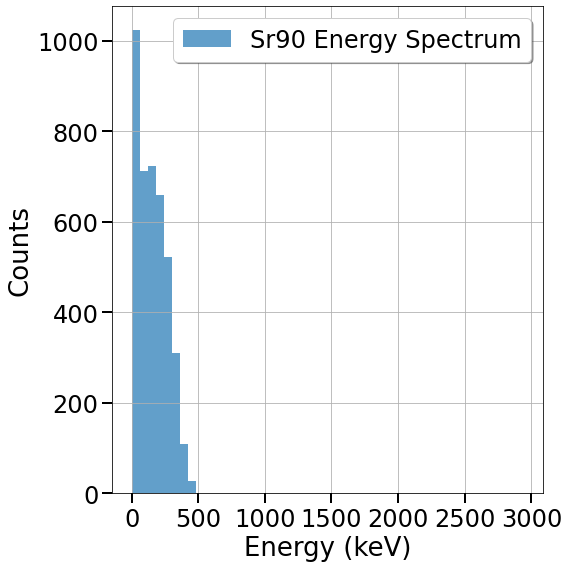

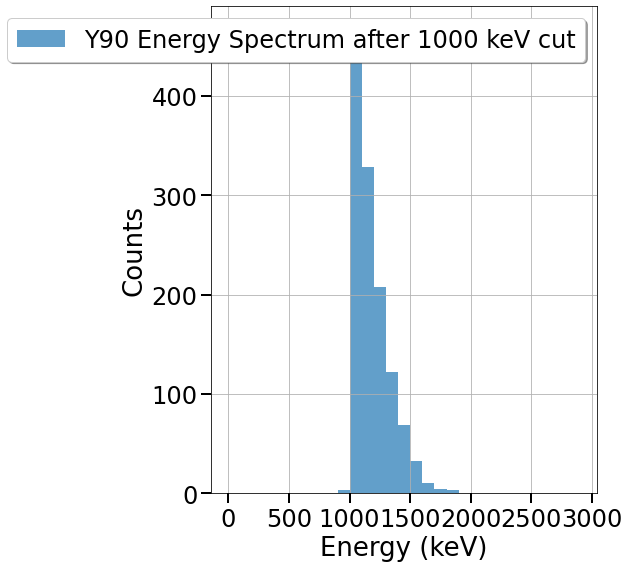

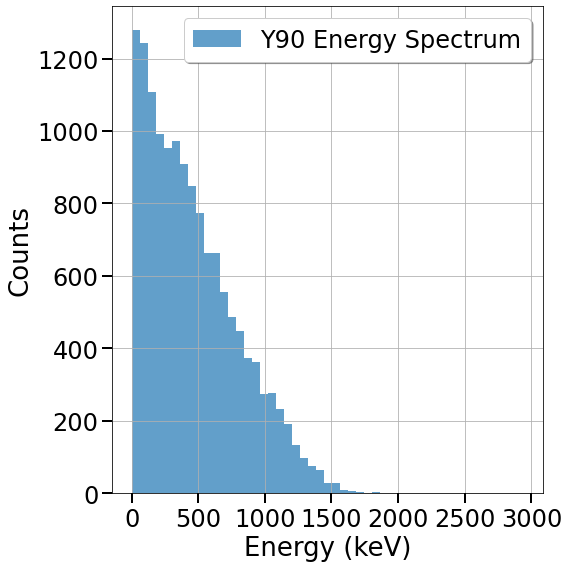

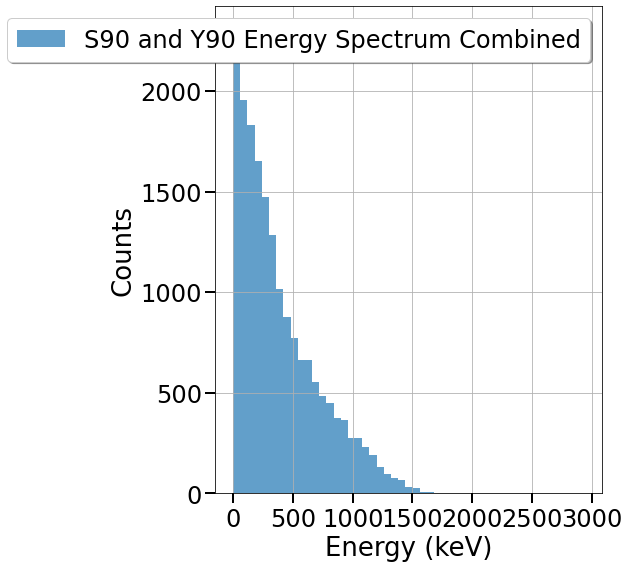

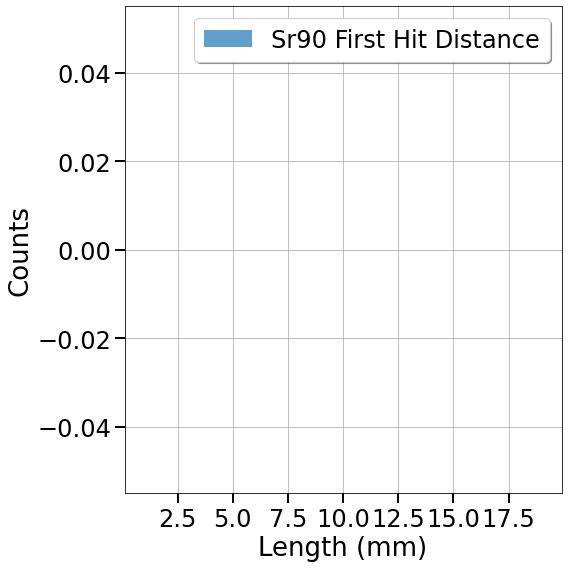

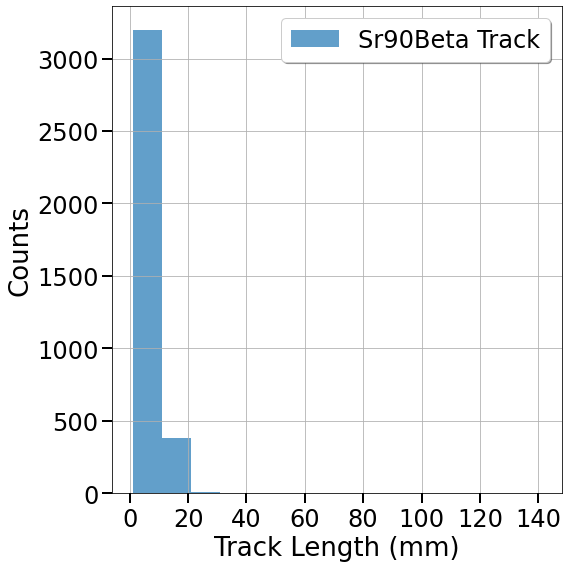

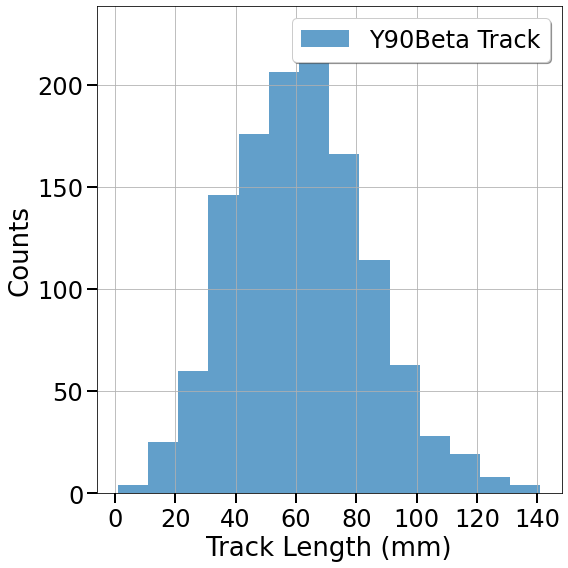

In [28]:
PlotsforSr90(Sr90_7mm,"Sr9010bar_7mm",lenbins=np.arange(1,150,10))